<a href="https://colab.research.google.com/github/Renan-Domingues/ml-2024/blob/main/CelciusAndFahrenheits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple TensorFlow project just to remind myself some lines of code

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


## Preparing Data


In [ ]:
# definir intervalos de números

min_value = 0
max_value = 40

num_samples = 100

tf.random.set_seed(42)

X = tf.random.uniform(shape=[num_samples], minval=min_value, maxval=max_value)

print(X)

tf.Tensor(
[26.582485  17.64027   14.1153    18.579302   1.3464165 27.386894
 29.604698  34.89778    9.053054   8.927875  12.415524  28.893433
  5.327487  21.922554  22.984352  35.98734    0.3785467 20.849228
 25.381779   7.973132  29.176899  21.833382   4.302621  27.068243
 26.411053  13.478017  24.056705   8.425031  34.10949   17.62487
 37.9411     9.501038  32.471718  21.053577  19.77232    8.645139
 33.82879   34.875366  12.335448  27.472153   9.505615  31.268911
 38.685535   2.748065  31.949577  26.411486  23.486052   6.5846777
 29.524094  12.821617  24.295597  18.60939   39.121418  28.892578
 12.938819  33.030933  19.907661   7.7934694 30.354992  13.521776
 11.251225  12.605429  24.26837   29.994392  20.06422    7.3128653
  5.271926  25.85445   38.2379    26.68294   12.302213  14.756875
 17.89436    7.3437834 21.15302   28.211018  35.94532   12.554517
 24.935303  38.72621    4.4831705 11.836214  37.42642    5.365052
 12.775173  10.49108    1.2595034 36.01821   25.637516  23.28742

In [ ]:
Y = (X * 1.8) + 32

X_unsqueeze = tf.expand_dims(X, axis=1)
Y_unsqueeze = tf.expand_dims(Y, axis=1)

print(X_unsqueeze[:10], Y_unsqueeze[:10])

tf.Tensor(
[[26.582485 ]
 [17.64027  ]
 [14.1153   ]
 [18.579302 ]
 [ 1.3464165]
 [27.386894 ]
 [29.604698 ]
 [34.89778  ]
 [ 9.053054 ]
 [ 8.927875 ]], shape=(10, 1), dtype=float32) tf.Tensor(
[[79.84847 ]
 [63.752487]
 [57.40754 ]
 [65.44274 ]
 [34.42355 ]
 [81.29641 ]
 [85.28845 ]
 [94.81601 ]
 [48.295494]
 [48.070175]], shape=(10, 1), dtype=float32)


In [ ]:
# Split data into train and test
train_split = int(0.8 * len(X))

X_train = X[:train_split]
Y_train = Y[:train_split]

X_test = X[train_split:]
Y_test = Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(80, 80, 20, 20)

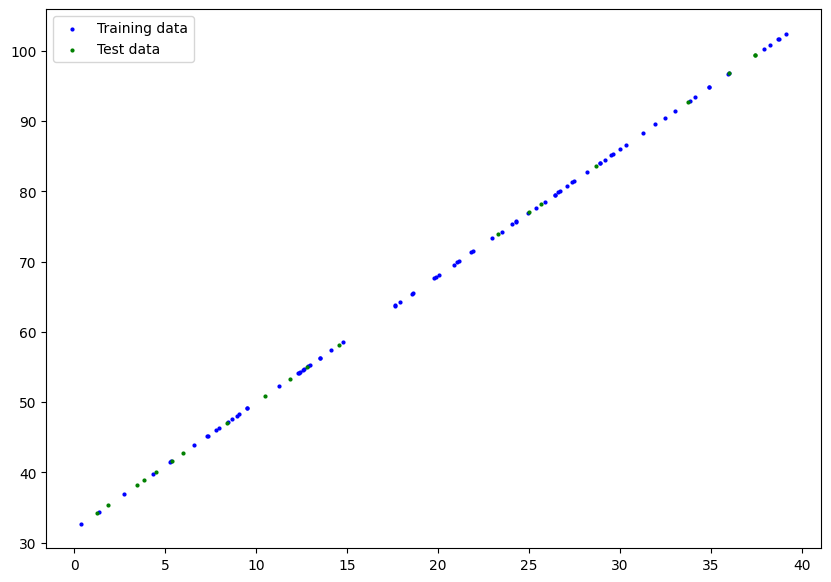

In [ ]:
plt.figure(figsize=(10, 7))

# Train
plt.scatter(X_train, Y_train, c="b", s=4, label="Training data")

# Test
plt.scatter(X_test, Y_test, c="g",  s=4, label="Test data")

plt.legend()
plt.show()

## Modelo para treinamento

In [ ]:
# Definir modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(96, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # lower lr to  get lower loss
              loss='mae',)

# Train model
model.fit(X_train, Y_train, epochs=300)

# Test model
loss = model.evaluate(X_test, Y_test)
print(f"Loss: {loss}")


Epoch 1/300
3/3 [==============================] - 1s 5ms/step - loss: 69.9853
Epoch 2/300
3/3 [==============================] - 0s 4ms/step - loss: 68.4803
Epoch 3/300
3/3 [==============================] - 0s 4ms/step - loss: 67.4795
Epoch 4/300
3/3 [==============================] - 0s 4ms/step - loss: 66.6025
Epoch 5/300
3/3 [==============================] - 0s 4ms/step - loss: 65.6792
Epoch 6/300
3/3 [==============================] - 0s 4ms/step - loss: 64.6790
Epoch 7/300
3/3 [==============================] - 0s 4ms/step - loss: 63.5588
Epoch 8/300
3/3 [==============================] - 0s 4ms/step - loss: 62.3159
Epoch 9/300
3/3 [==============================] - 0s 4ms/step - loss: 60.8389
Epoch 10/300
3/3 [==============================] - 0s 4ms/step - loss: 59.1608
Epoch 11/300
3/3 [==============================] - 0s 4ms/step - loss: 57.1729
Epoch 12/300
3/3 [==============================] - 0s 5ms/step - loss: 54.9213
Epoch 13/300
3/3 [==============================]

In [ ]:
new_temperature = tf.constant([23, 12, 35, 7]) # in Fahrenheit it is ([73.4 | 53.6 | 95 | 44.6])

predict = model.predict(new_temperature)
print(predict)

1/1 [==============================] - 0s 103ms/step
[[72.71339 ]
 [53.184597]
 [94.01751 ]
 [44.307877]]


## Comparing the data with those trained by the model.

In [ ]:
# model prediction

predict = model.predict(X_train)

3/3 [==============================] - 0s 8ms/step


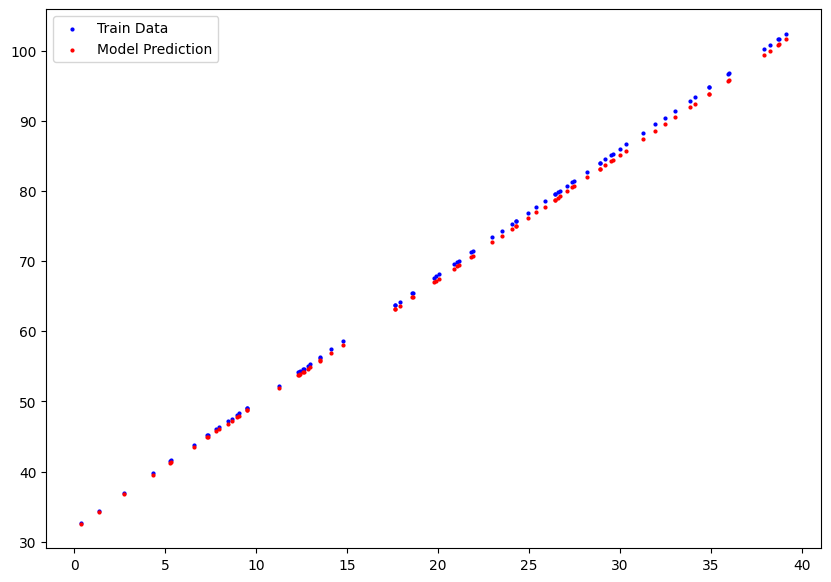

In [ ]:
# The old data with the predicted one

plt.figure(figsize=(10,7))

# Train
plt.scatter(X_train, Y_train, c="b", s=4, label="Train Data")

# Model prediction
plt.scatter(X_train, predict, c="r", s=4, label="Model Prediction")

plt.legend()
plt.show()